In [1]:
notebook creates a screeplot (cumulative variance explained by number of principal components)

UsageError: unrecognized arguments: a screeplot (cumulative variance explained by number of principal components)


In [2]:
import os 
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7, 7)

In [3]:
#move up in directory
os.chdir('../')

from helpers import dot2_

In [4]:
os.getcwd()

'C:\\Users\\deniz\\Desktop\\PhD\\p1_generalization'

In [5]:
# CONFIG
### RNN
PATH_RNN_DATA ='data/rnn_raw_data/'
RNN_FILE_NAME = 'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}'

# number of RNN instances
N_IDS = 30
# number of random walk instances
N_WALKS = 3
# Number of Principal Components to plot
N_PCS = 10

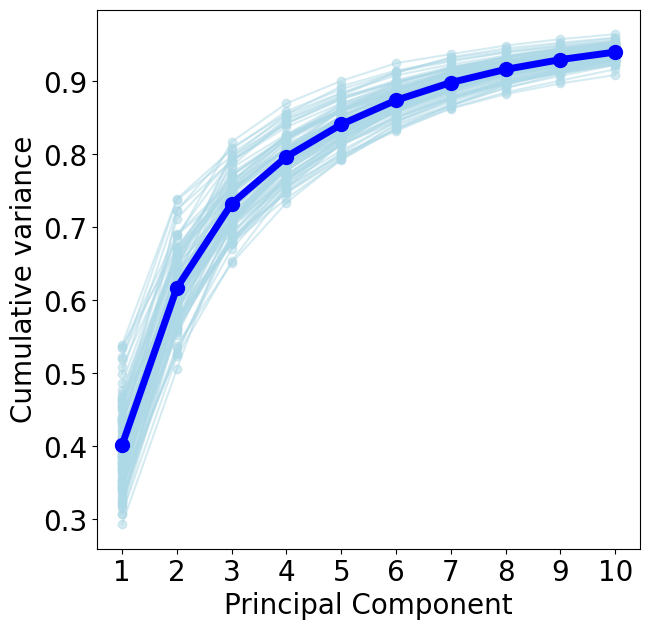

In [6]:
### scree plot

ratios = np.zeros([N_IDS * N_WALKS,48])
rnn_file_path = PATH_RNN_DATA + RNN_FILE_NAME

i = 0
for id_ in range(N_IDS):
    for walk in range(1, N_WALKS+1):
        
        d = pickle.load(open(rnn_file_path.format(id_, walk), 'rb'))
        df = d.reset_index()

        ### calculate PCs
        pca = PCA()
        hidden_units = df.loc[:, [col.startswith('rnn_state') for col in df.columns.values]]
        st_hidden = StandardScaler().fit_transform(hidden_units)  
        pca.fit_transform(st_hidden)
        
        ratios[i, :] = pca.explained_variance_ratio_.cumsum().reshape(1, -1)

        i += 1
        
        # plot individual lines
        plt.plot(pca.explained_variance_ratio_.cumsum()[:N_PCS], color = 'lightblue', alpha = 0.5)
        plt.scatter(range(10), pca.explained_variance_ratio_.cumsum()[:10], color = 'lightblue', alpha = 0.5)

# plot mean line
plt.plot(np.mean(ratios, axis = 0)[:N_PCS], color = 'blue', zorder=3, linewidth=5)
plt.scatter(range(10), np.mean(ratios, axis = 0)[:N_PCS], color = 'blue', zorder=3, s = 100)

plt.xticks(np.arange(10), np.arange(1, 11))
plt.ylabel('Cumulative variance')
plt.xlabel('Principal Component')

plt.savefig('../p1_generalization/plots/scree_plot.jpeg', dpi = 600)

In [7]:
# Statistics
np.mean(ratios, axis = 0)[:N_PCS]

array([0.40167793, 0.61711158, 0.7325264 , 0.79670961, 0.84109545,
       0.87420204, 0.89844821, 0.91646574, 0.92989753, 0.9401768 ])